In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/aweglteo/tokyo_weather_data/main/data.csv",
    parse_dates=True,
    index_col=0,
)
df.sort_index(inplace=True)

In [4]:
target_var = "rain"
exog_vars = ["cloud", "wind", "ave_tmp", "max_tmp", "min_tmp"]

In [5]:
split_idx = int(len(df) * 0.8)
train = df.iloc[:split_idx]
test = df.iloc[split_idx:]

y_train = train[target_var]
X_train = train[exog_vars]

y_test = test[target_var]
X_test = test[exog_vars]

In [ ]:
model = SARIMAX(
    y_train,
    exog=X_train,
    order=(1, 0, 1),
    enforce_stationarity=False,
    enforce_invertibility=False,
)
results = model.fit(disp=False)
print("\nARIMAXモデルのサマリー:")
print(results.summary())

/home/mori/miniforge3/envs/radonpy/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/mori/miniforge3/envs/radonpy/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)



ARIMAXモデルのサマリー:
                               SARIMAX Results                                
Dep. Variable:                   rain   No. Observations:                 1461
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -5866.365
Date:                Sun, 02 Feb 2025   AIC                          11748.729
Time:                        20:51:08   BIC                          11791.013
Sample:                    05-17-2018   HQIC                         11764.503
                         - 05-16-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cloud          0.9597      0.131      7.318      0.000       0.703       1.217
wind           2.5505      0.433      5.885      0.000       1.701       3.400
ave_tmp        0.4692      0.752   

In [7]:
y_train_pred = results.predict(start=train.index[0], end=train.index[-1], exog=X_train)
y_test_pred = results.predict(start=test.index[0], end=test.index[-1], exog=X_test)

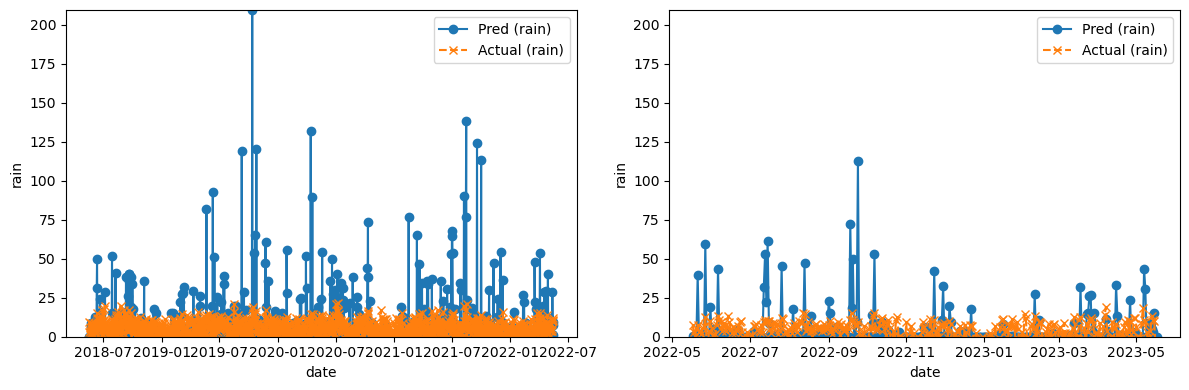

In [9]:
plot_data = [
    {
        "name": "train",
        "true": {"x": y_train.index, "y": y_train},
        "pred": {"x": y_train.index, "y": y_train_pred},
    },
    {
        "name": "test",
        "true": {"x": y_test.index, "y": y_test},
        "pred": {"x": y_test.index, "y": y_test_pred},
    },
]
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
for ax, data in zip(axes, plot_data):
    ax.plot(data["true"]["x"], data["true"]["y"], label="Pred (rain)", marker="o")
    ax.plot(
        data["pred"]["x"],
        data["pred"]["y"],
        label="Actual (rain)",
        marker="x",
        linestyle="--",
    )
    ax.set_xlabel("date")
    ax.set_ylabel("rain")
    ax.set_ylim(0, df["rain"].max())
    ax.legend()
fig.tight_layout()

In [11]:
mse = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print(f"\nTest MSE: {mse:.2f}")
print(f"Test R^2: {r2:.2f}")


Test MSE: 6.48
Test R^2: 0.14


(array([1.704e+03, 7.500e+01, 2.800e+01, 9.000e+00, 3.000e+00, 5.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  0.  ,  20.95,  41.9 ,  62.85,  83.8 , 104.75, 125.7 , 146.65,
        167.6 , 188.55, 209.5 ]),
 <BarContainer object of 10 artists>)

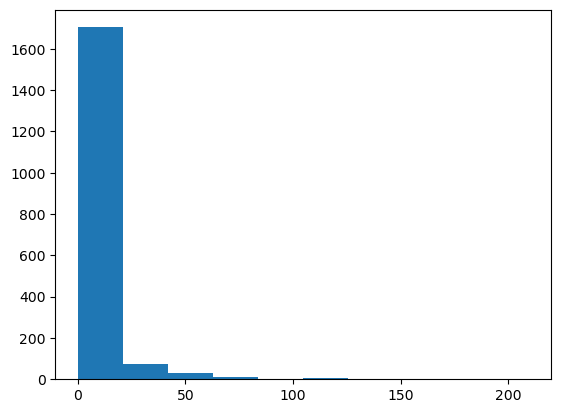

In [12]:
plt.hist(df["rain"])